In [1]:
from transformers import pipeline

# Pipelines for inference
The pipeline() makes it simple to use any model from the Hub for inference on any language, computer vision, speech, and multimodal tasks.

Even if you don’t have experience with a specific modality or aren’t familiar with the underlying code behind the models, you can still use them for inference with the pipeline().

This tutorial will teach you to:
* Use a pipeline() for inference.
* Use a specific tokenizer or model.
* Use a pipeline() for audio, vision, and multimodal tasks.

## Pipeline usage
While each task has an associated pipeline(), it is simpler to use the general pipeline() abstraction which contains all the task-specific pipelines.The pipeline() automatically loads a default model and a preprocessing class capable of inference for your task.

1. Start by creating a pipeline() and specify an inference task:

In [1]:
generator = pipeline(task="automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2. Pass your input text to the pipeline():

In [3]:
generator("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")

{'text': 'I HAVE A DREAM BUT ONE DAY THIS NATION WILL RISE UP LIVE UP THE TRUE MEANING OF ITS TREES'}

Not the result you had in mind? Check out some of the [most downloaded automatic speech recognition models](https://huggingface.co/models?pipeline_tag=automatic-speech-recognition&sort=downloads) on the Hub to see if you can get a better transcription. Let’s try [openai/whisper-large](https://huggingface.co/openai/whisper-large):

In [5]:
generator = pipeline(model="openai/whisper-large")
generator("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")

/home/zonghang/.conda/envs/gpt/lib/python3.8/site-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (448) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}

Now this result looks more accurate!

If you have several inputs, you can pass your input as a list:

In [6]:
generator(
    [
        "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac",
        "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/1.flac",
    ]
)

/home/zonghang/.conda/envs/gpt/lib/python3.8/site-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (448) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/home/zonghang/.conda/envs/gpt/lib/python3.8/site-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (448) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'},
 {'text': ' He hoped there would be stew for dinner, turnips and carrots and bruised potatoes and fat mutton pieces to be ladled out in thick, peppered flour-fattened sauce.'}]

## Parameters
pipeline() supports many parameters, some are task specific, and some are general to all pipelines. Let’s check out 3 important ones:

### Device
If you use <code>device=0</code>, the pipeline automatically puts the model on the specified device.

In [7]:
generator = pipeline(model="openai/whisper-large", device=0)

If the model is too large for a single GPU, you can set <code>device_map="auto"</code> to allow [Accelerate](https://huggingface.co/docs/accelerate/index) to automatically determine how to load and store the model weights.

In [ ]:
generator = pipeline(model="openai/whisper-large", device_map="auto")

Note that if <code>device_map="auto"</code> is passed, there is no need to add the argument <code>device=0</code> when instantiating your pipeline.

## Batch size
By default, pipelines will not batch inference, because batching is not always a winner for performance. It can be either a 10x speedup or 5x slowdown depending on hardware, data and the actual model being used.

But if it works in your use case, you can use:

In [ ]:
from transformers import pipeline

In [1]:
generator = pipeline(model="openai/whisper-large", device=0, batch_size=2)
generator(
    [
        "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac",
        "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/1.flac",
    ]
)

/home/zonghang/.conda/envs/gpt/lib/python3.8/site-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (448) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'},
 {'text': ' He hoped there would be stew for dinner, turnips and carrots and bruised potatoes and fat mutton pieces to be ladled out in thick, peppered flour-fattened sauce.'}]

### Task specific parameters
All tasks provide task specific parameters which allow for additional flexibility and options to help you get your job done.

For instance, the transformers.AutomaticSpeechRecognitionPipeline.call() method has a return_timestamps parameter which sounds promising for subtitling videos:

In [1]:
from transformers import pipeline

In [2]:
generator = pipeline(model="facebook/wav2vec2-large-960h-lv60-self", return_timestamps="word")
generator("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h-lv60-self and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'text': 'I HAVE A DREAM BUT ONE DAY THIS NATION WILL RISE UP AND LIVE OUT THE TRUE MEANING OF ITS CREED',
 'chunks': [{'text': 'I', 'timestamp': (1.22, 1.24)},
  {'text': 'HAVE', 'timestamp': (1.42, 1.58)},
  {'text': 'A', 'timestamp': (1.66, 1.68)},
  {'text': 'DREAM', 'timestamp': (1.76, 2.14)},
  {'text': 'BUT', 'timestamp': (3.68, 3.8)},
  {'text': 'ONE', 'timestamp': (3.94, 4.06)},
  {'text': 'DAY', 'timestamp': (4.16, 4.3)},
  {'text': 'THIS', 'timestamp': (6.36, 6.54)},
  {'text': 'NATION', 'timestamp': (6.68, 7.1)},
  {'text': 'WILL', 'timestamp': (7.32, 7.56)},
  {'text': 'RISE', 'timestamp': (7.8, 8.26)},
  {'text': 'UP', 'timestamp': (8.38, 8.48)},
  {'text': 'AND', 'timestamp': (10.08, 10.18)},
  {'text': 'LIVE', 'timestamp': (10.26, 10.48)},
  {'text': 'OUT', 'timestamp': (10.58, 10.7)},
  {'text': 'THE', 'timestamp': (10.82, 10.9)},
  {'text': 'TRUE', 'timestamp': (10.98, 11.18)},
  {'text': 'MEANING', 'timestamp': (11.26, 11.58)},
  {'text': 'OF', 'timestamp': (11.66, 1

As you can see, the model inferred the text and also outputted when these words were pronounced.

There are many parameters available for each task, so check out each task’s API reference to see what you can tinker with!

## Vision pipeline
Using a pipeline() for vision tasks is practically identical. Specify your task and pass your image to the classifier. The image can be a link or a local path to the image. 

For example, what species of cat is shown below?

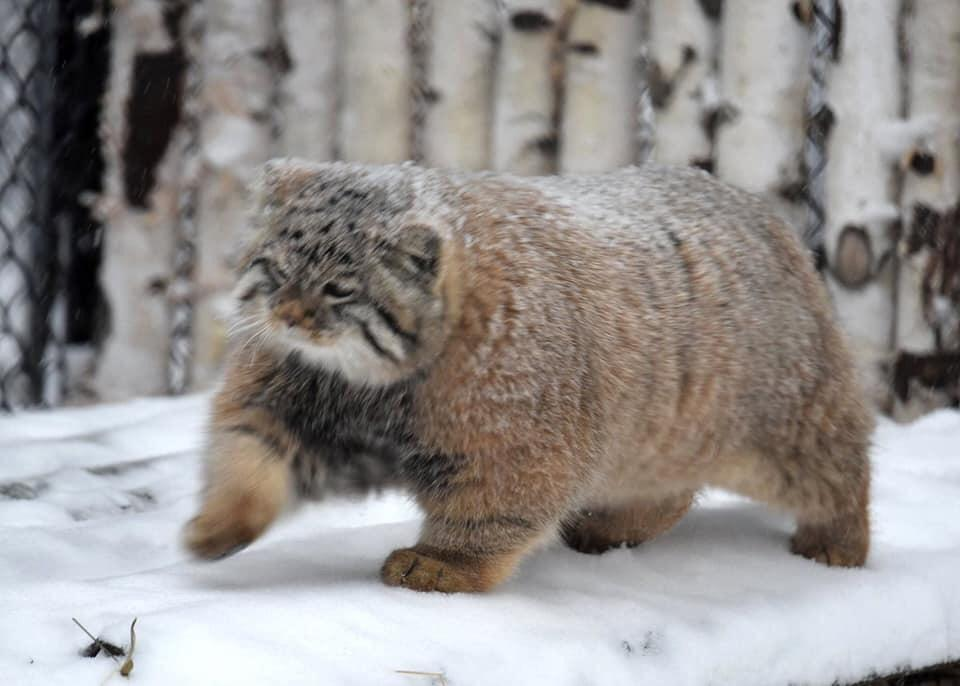

In [1]:
from transformers import pipeline

image_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
vision_classifier = pipeline(model="google/vit-base-patch16-224")
preds = vision_classifier(images=image_url)
[{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]

[{'score': 0.4335, 'label': 'lynx, catamount'},
 {'score': 0.0348,
  'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'},
 {'score': 0.0324, 'label': 'snow leopard, ounce, Panthera uncia'},
 {'score': 0.0239, 'label': 'Egyptian cat'},
 {'score': 0.0229, 'label': 'tiger cat'}]

## Text pipeline

In [1]:
from transformers import pipeline

# This model is a `zero-shot-classification` model.
# It will classify text, except you are free to choose any label you might imagine
classifier = pipeline(model="facebook/bart-large-mnli")
classifier(
    "I have a problem with my iphone that needs to be resolved asap!!",
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer"],
)

{'sequence': 'I have a problem with my iphone that needs to be resolved asap!!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.5036360621452332,
  0.47879931330680847,
  0.012600106187164783,
  0.0026557871606200933,
  0.002308761700987816]}

## Multimodal pipeline
The pipeline() supports more than one modality. For example, a visual question answering (VQA) task combines text and image. Feel free to use any image link you like and a question you want to ask about the image. The image can be a URL or a local path to the image.

For example, if you use this invoice image:

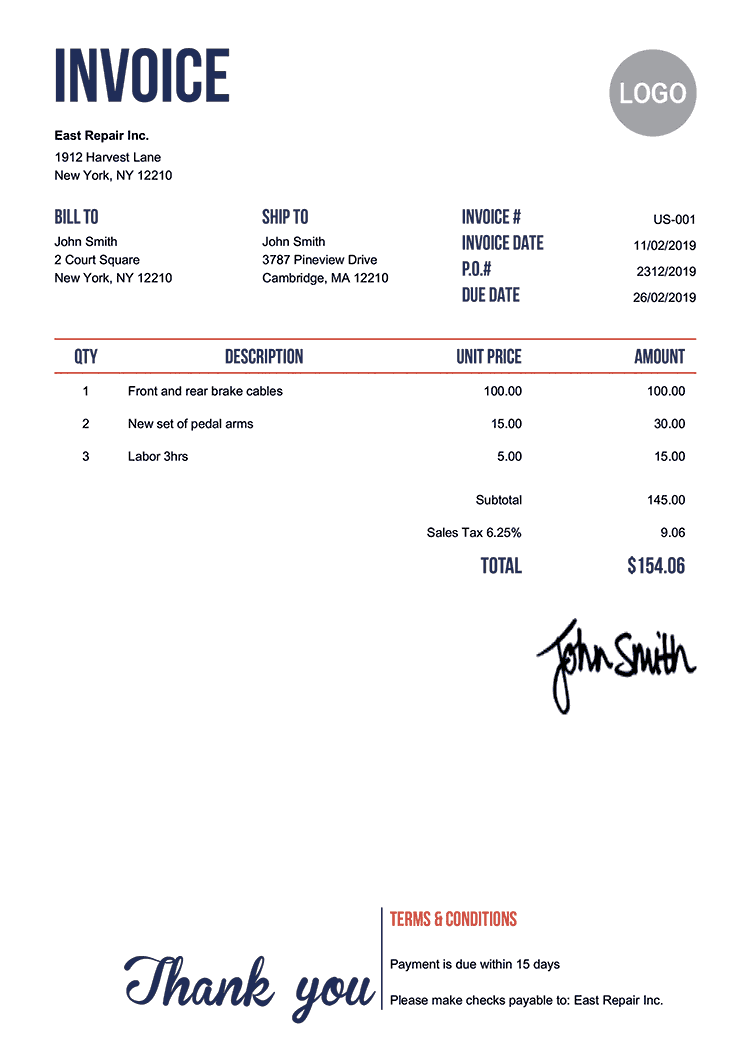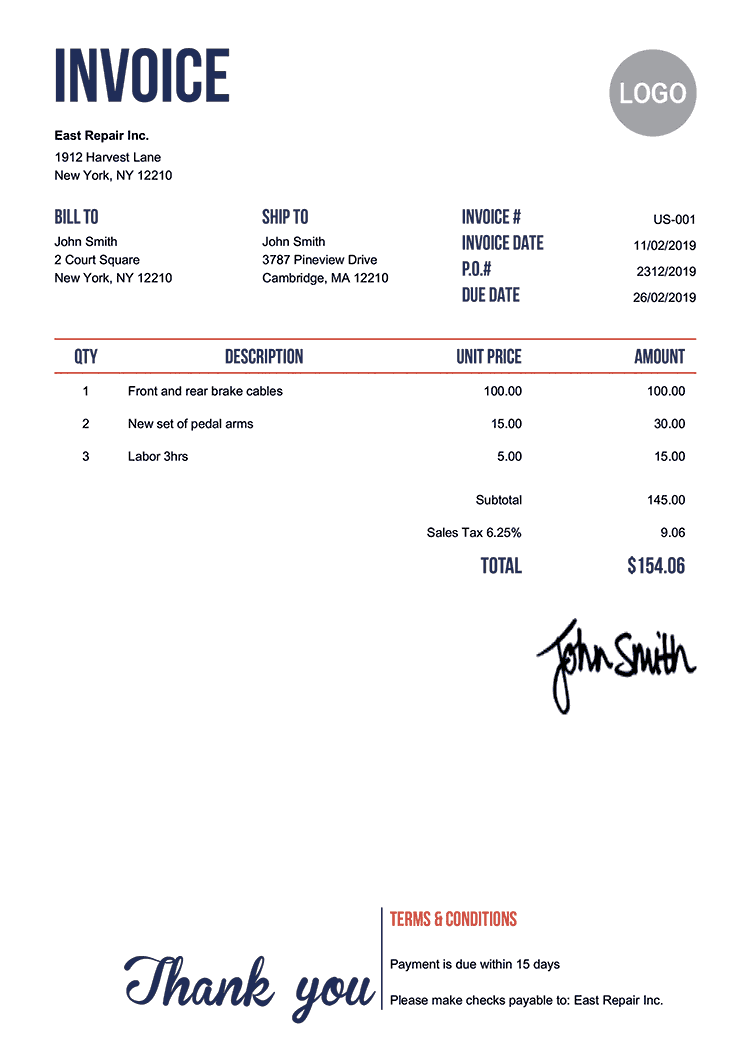

In [1]:
from transformers import pipeline

vqa = pipeline(model="impira/layoutlm-document-qa")
vqa(
    image="https://huggingface.co/spaces/impira/docquery/resolve/2359223c1837a7587402bda0f2643382a6eefeab/invoice.png",
    question="What is the invoice number?",
)

[{'score': 0.8480640649795532, 'answer': 'us-001', 'start': 16, 'end': 16}]

> To run the example above you need to have pytesseract installed.
> ```
>     sudo apt install -y tesseract-ocr
>     pip install pytesseract
> ```

## Using pipeline on large models with Accelerate
You can easily run pipeline on large models using Accelerate. First make sure you have installed accelerate with <code>pip install accelerate</code>.

First load your model using device_map="auto"! We will use facebook/opt-1.3b for our example.

In [1]:
import torch
from transformers import pipeline

pipe = pipeline(model="facebook/opt-1.3b", torch_dtype=torch.bfloat16, device_map="auto")
pipe("This is a cool example!", do_sample=True, top_p=0.95)

[{'generated_text': 'This is a cool example! It makes me want to start building some of my own now. Where'}]

Now you can replace the checkpoint with any of the HuggingFace model that supports large model loading such as GPT-3!